In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data set

Data = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Assignment DS (Husen)\Assignment No 18\Forecasting\CocaCola_Sales_Rawdata.xlsx")
Data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
Data.shape

(42, 2)

In [6]:
# copy the orignal data

df = Data.copy()

In [7]:
df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [8]:
quarter=['Q1','Q2','Q3','Q4']
n=df['Quarter'][0]
n[0:2]

df['quarter']=0

In [9]:
for i in range(42):
    n=df['Quarter'][i]
    df['quarter'][i]=n[0:2]

In [10]:
dummy=pd.DataFrame(pd.get_dummies(df['quarter']))

In [11]:
coco=pd.concat((df,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

In [12]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [13]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

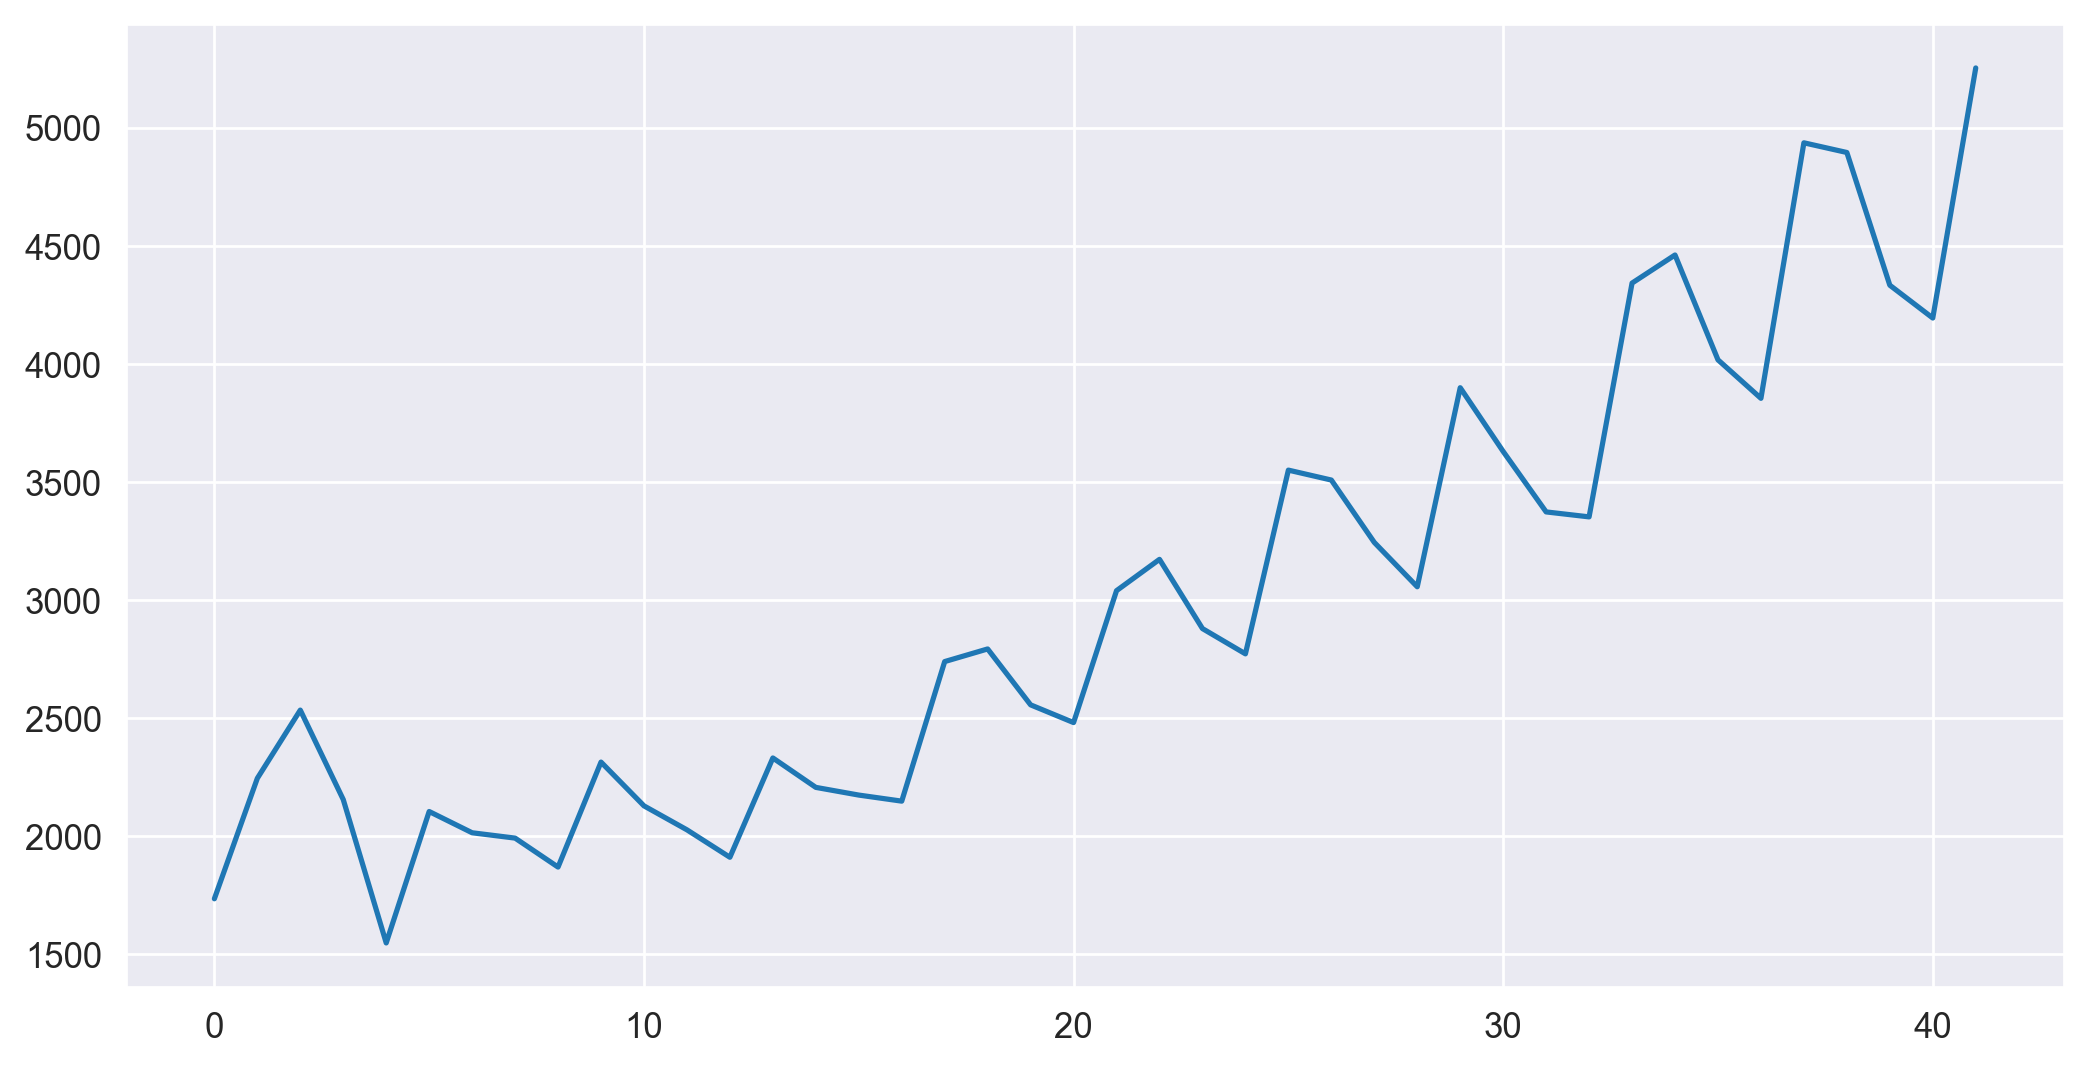

In [14]:
plt.plot(df['Sales'])

In [15]:
# First-order difference

df['First-Order'] = df['Sales'].diff(periods=1)
df

,Quarter,Sales,quarter,First-Order
0,Q1_86,1734.827000,Q1,NaN
1,Q2_86,2244.960999,Q2,510.133999
2,Q3_86,2533.804993,Q3,288.843994
3,Q4_86,2154.962997,Q4,-378.841995
4,Q1_87,1547.818996,Q1,-607.144001
5,Q2_87,2104.411995,Q2,556.592999
6,Q3_87,2014.362999,Q3,-90.048996
7,Q4_87,1991.746998,Q4,-22.616001
8,Q1_88,1869.049999,Q1,-122.696999
9,Q2_88,2313.631996,Q2,444.581997


In [16]:
#Drop na 

df.dropna(inplace=True)

In [17]:
df

,Quarter,Sales,quarter,First-Order
1,Q2_86,2244.960999,Q2,510.133999
2,Q3_86,2533.804993,Q3,288.843994
3,Q4_86,2154.962997,Q4,-378.841995
4,Q1_87,1547.818996,Q1,-607.144001
5,Q2_87,2104.411995,Q2,556.592999
6,Q3_87,2014.362999,Q3,-90.048996
7,Q4_87,1991.746998,Q4,-22.616001
8,Q1_88,1869.049999,Q1,-122.696999
9,Q2_88,2313.631996,Q2,444.581997
10,Q3_88,2128.320000,Q3,-185.311996


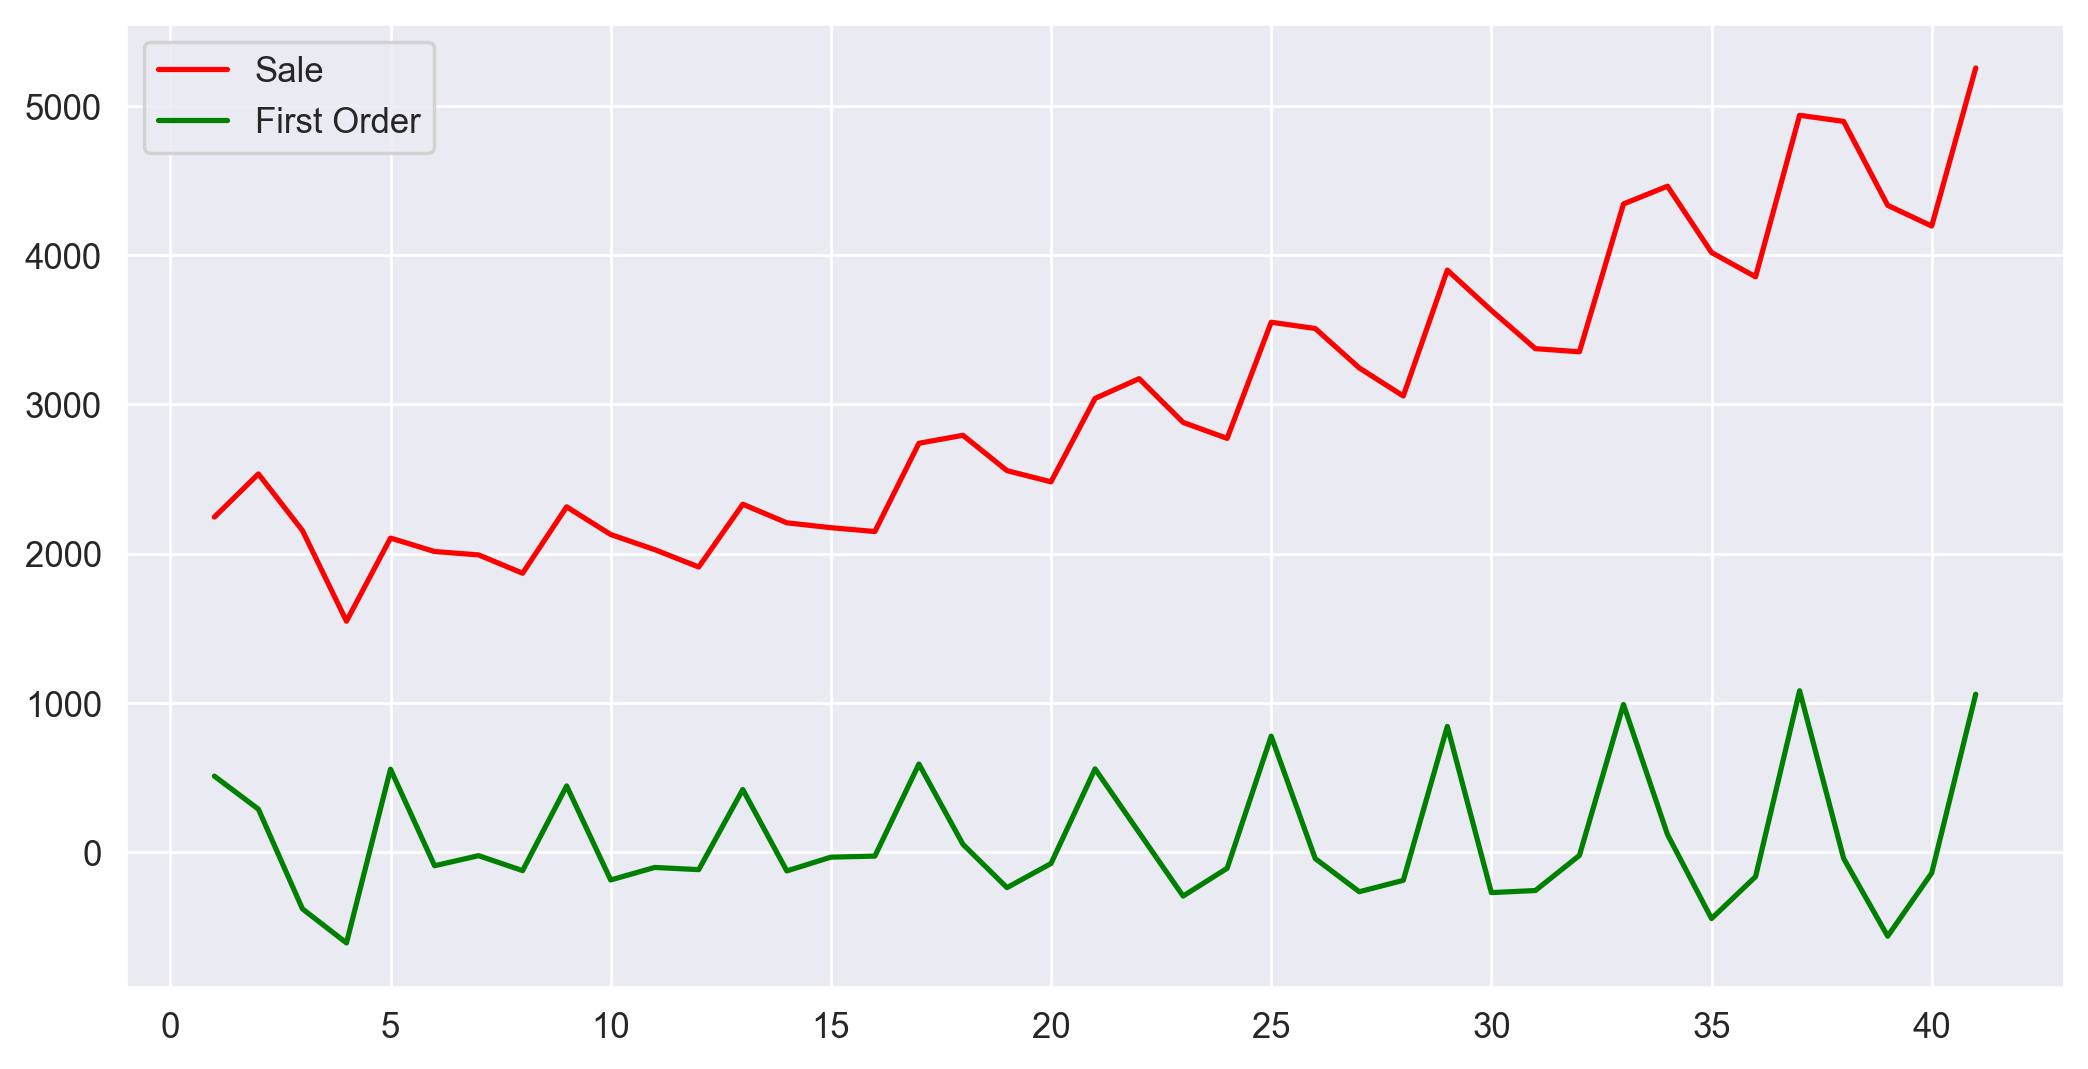

In [18]:
# Plot

plt.plot(df['Sales'], color = 'red', label = 'Sale')
plt.plot(df['First-Order'], color = 'green', label = 'First Order')
plt.legend()

In [19]:
#Calculate Autocorrelation

acf_values = acf(df['First-Order'])
acf_values

array([ 1.        , -0.12698142, -0.58248117, -0.14078903,  0.77149614,
       -0.14552797, -0.45200093, -0.08720848,  0.63989518, -0.10590553,
       -0.36920089, -0.09077286,  0.53661329, -0.13653501, -0.34381079,
       -0.04096384,  0.48023407])

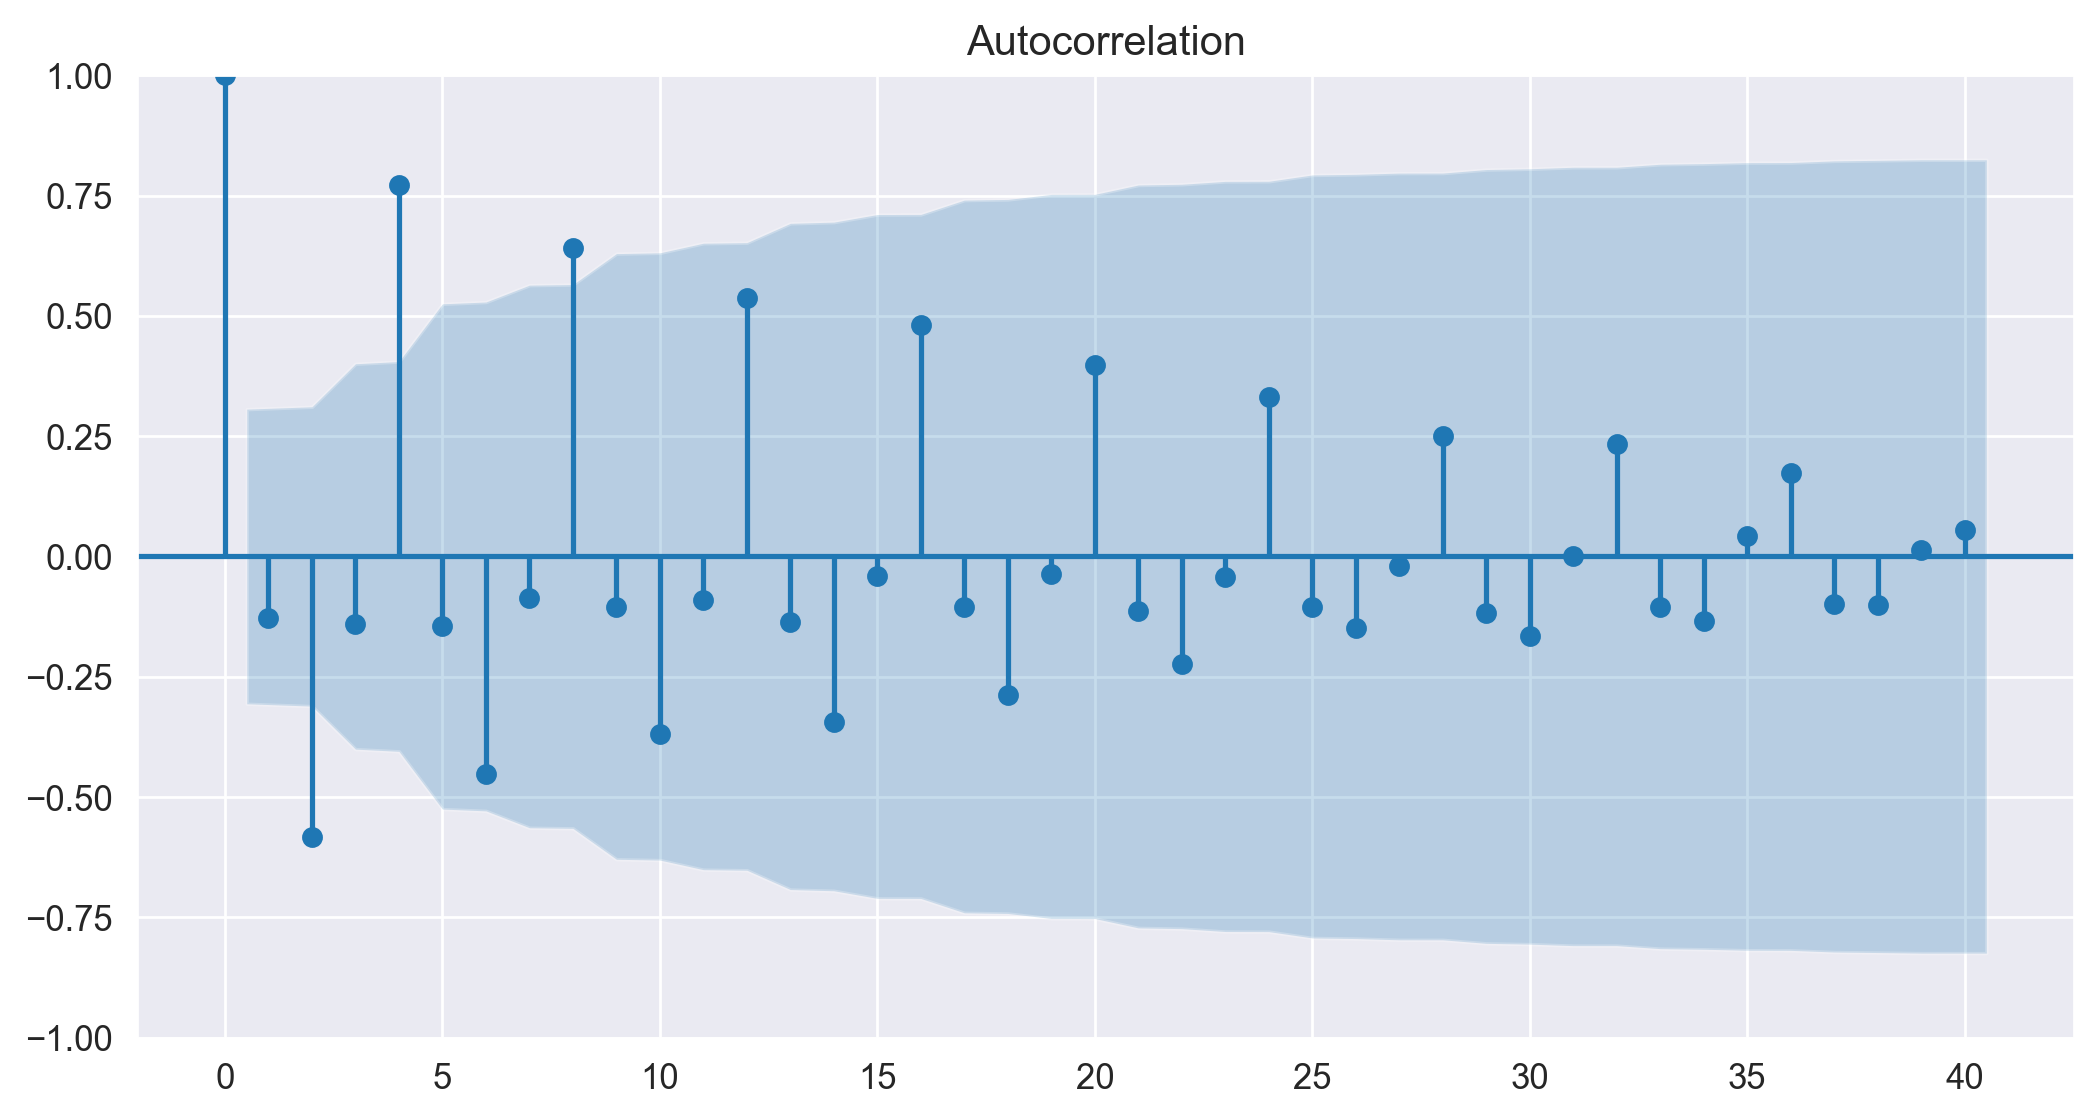

In [20]:
#Plot ACF

plot_acf(df['First-Order'], lags=40);

In [21]:
#Calculate PACF

pacf_val = pacf(df['First-Order'])
pacf_val

array([ 1.        , -0.13015595, -0.64013685, -0.6306896 ,  0.58559493,
       -0.39750543,  0.1046144 , -0.0772609 ,  0.18417045,  0.20544454,
       -0.00904403,  0.06302475,  0.30259239, -0.48114516, -0.13134357,
        0.0170421 , -0.28961627])

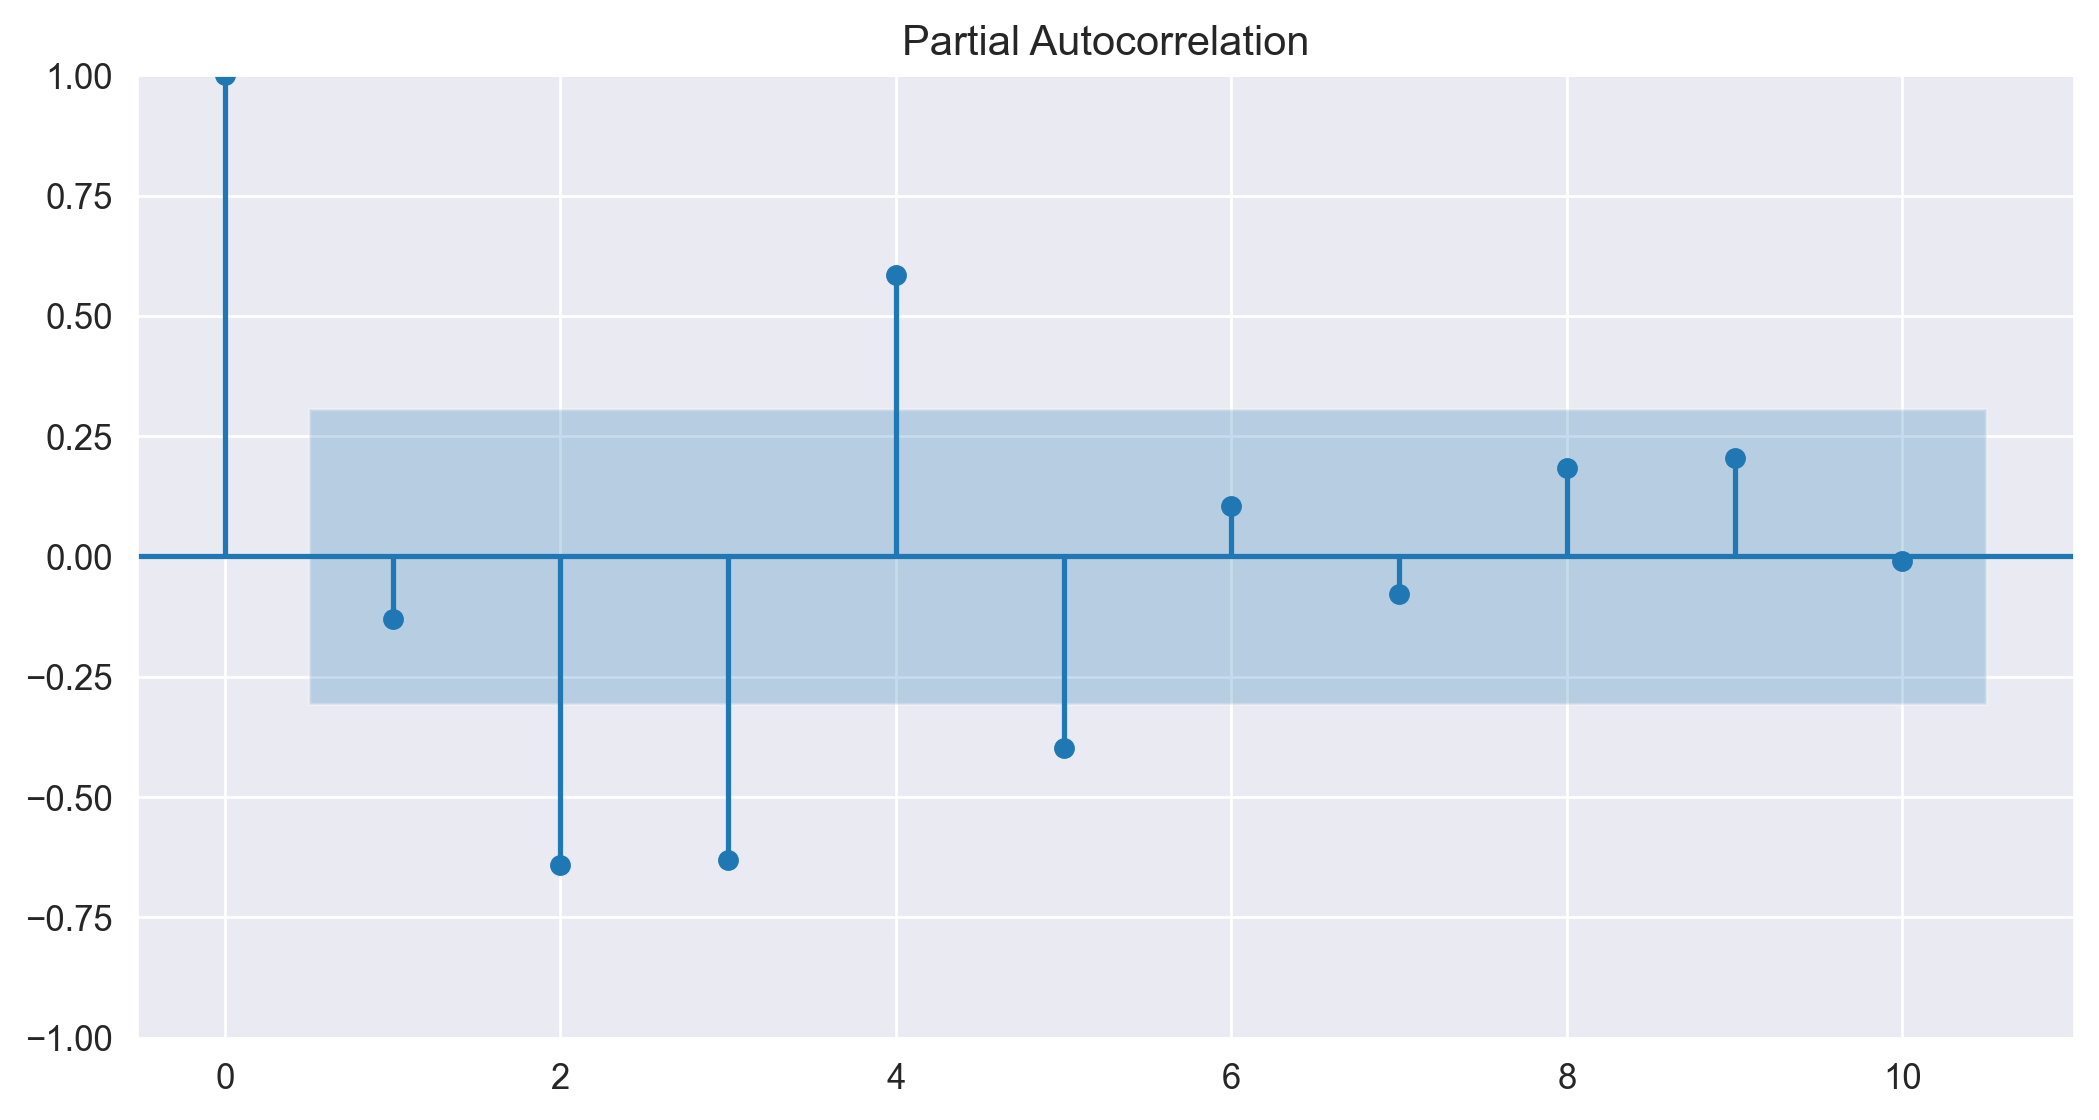

In [22]:
#Plot PACF

plot_pacf(df['First-Order'], lags=10);

In [23]:
coco.shape

(42, 9)

In [24]:
coco ['log_Sales'] = np.log (coco ['Sales']) 

In [25]:
Train = coco.head(32)
Test = coco.tail(10)

In [26]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
coco.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [29]:
Test['t']

32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
Name: t, dtype: int32

In [30]:
#Linear Model

import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

752.9233932767115

In [31]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Sales'], pred_Exp))
rmse_Exp

4387.940544839098

In [32]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Sales'],pred_Quad))
rmse_Quad

457.73573554072897

In [33]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

1850.4665461858358

In [34]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

277.35107711286446

In [35]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_sea))
rmse_Mult_sea

4388.397233580229

In [36]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_add_sea))
rmse_Mult_add_sea 

4387.942187885532

In [37]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
2,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
1,rmse_Exp,4387.940545
6,rmse_Mult_add_sea,4387.942188
5,rmse_Mult_sea,4388.397234


# Moving Average

<AxesSubplot:>

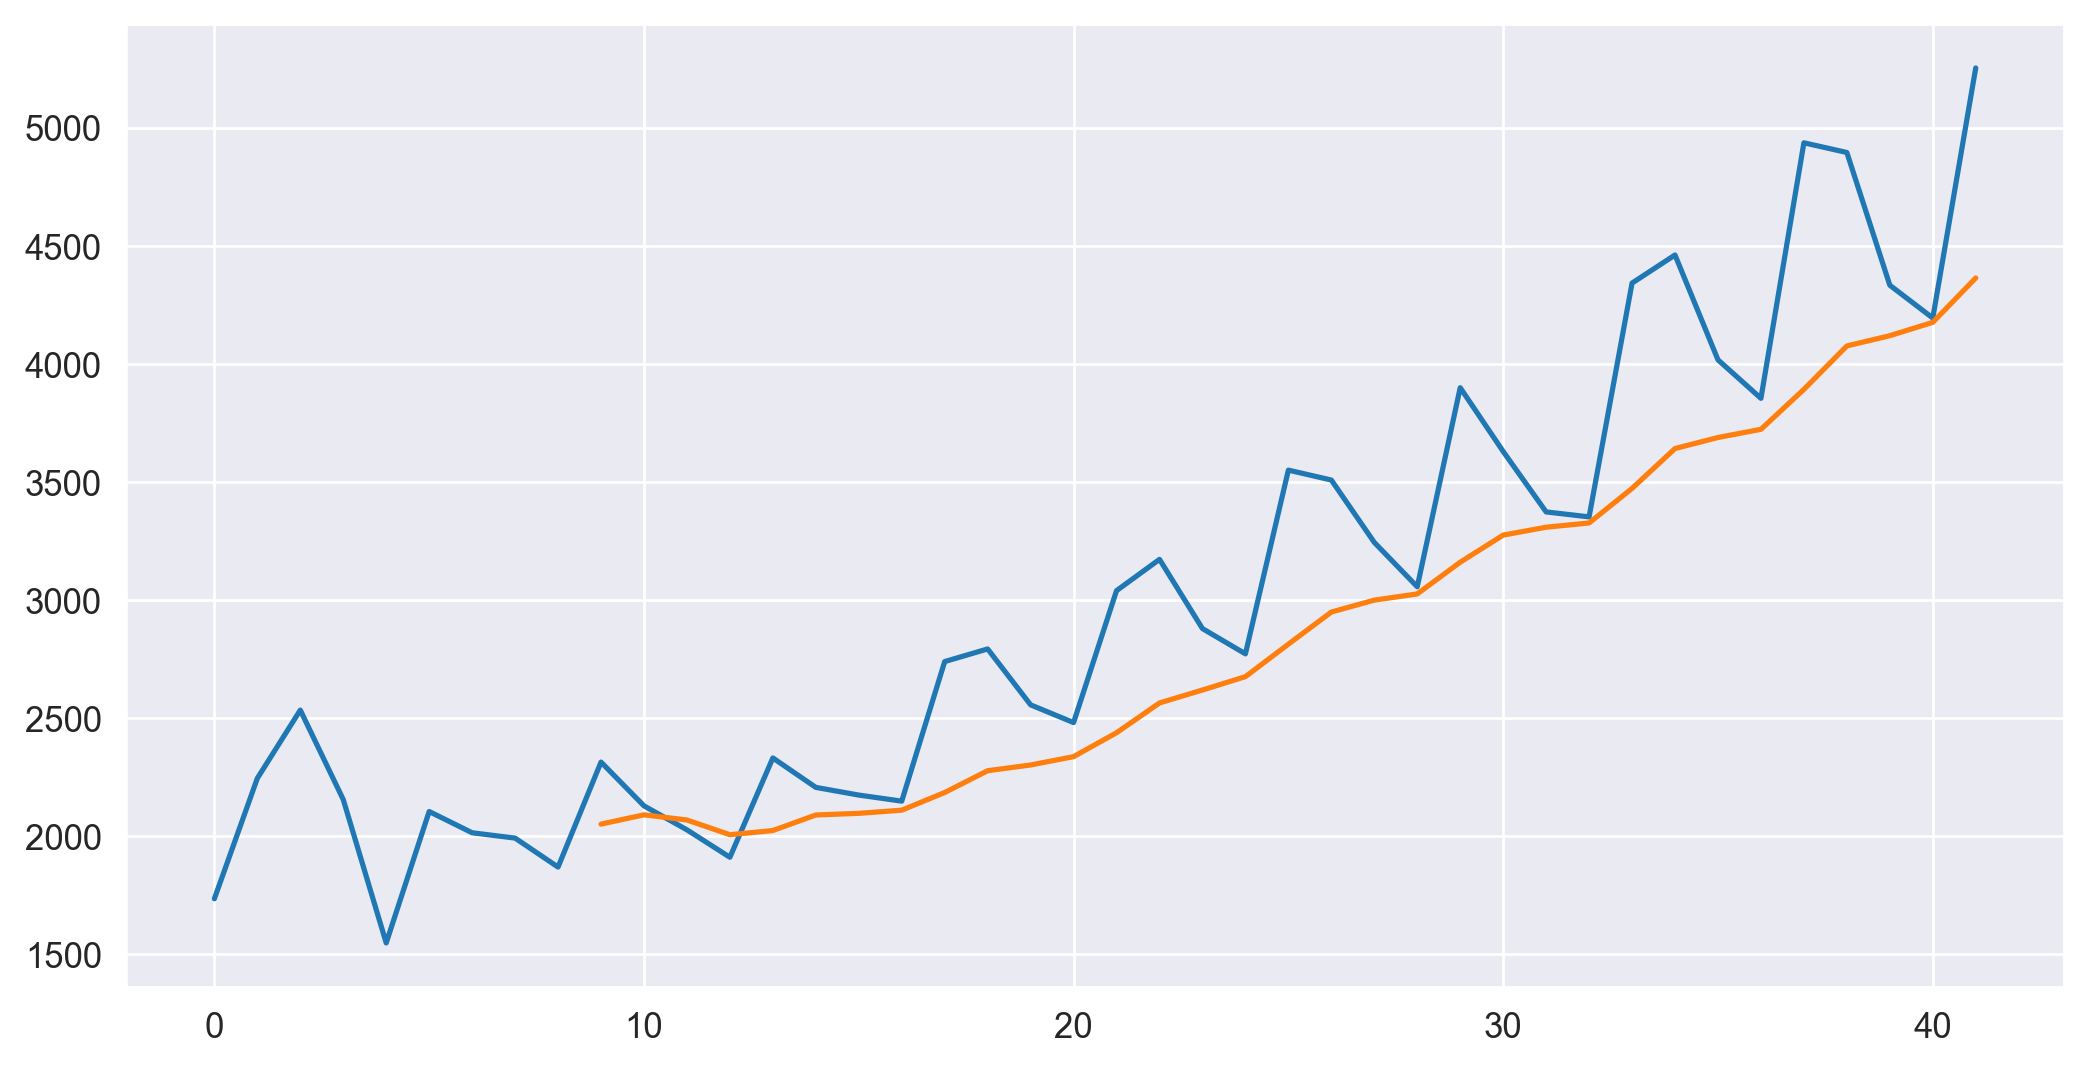

In [38]:
coco['Sales'].plot()
coco['Sales'].rolling(10).mean().plot()

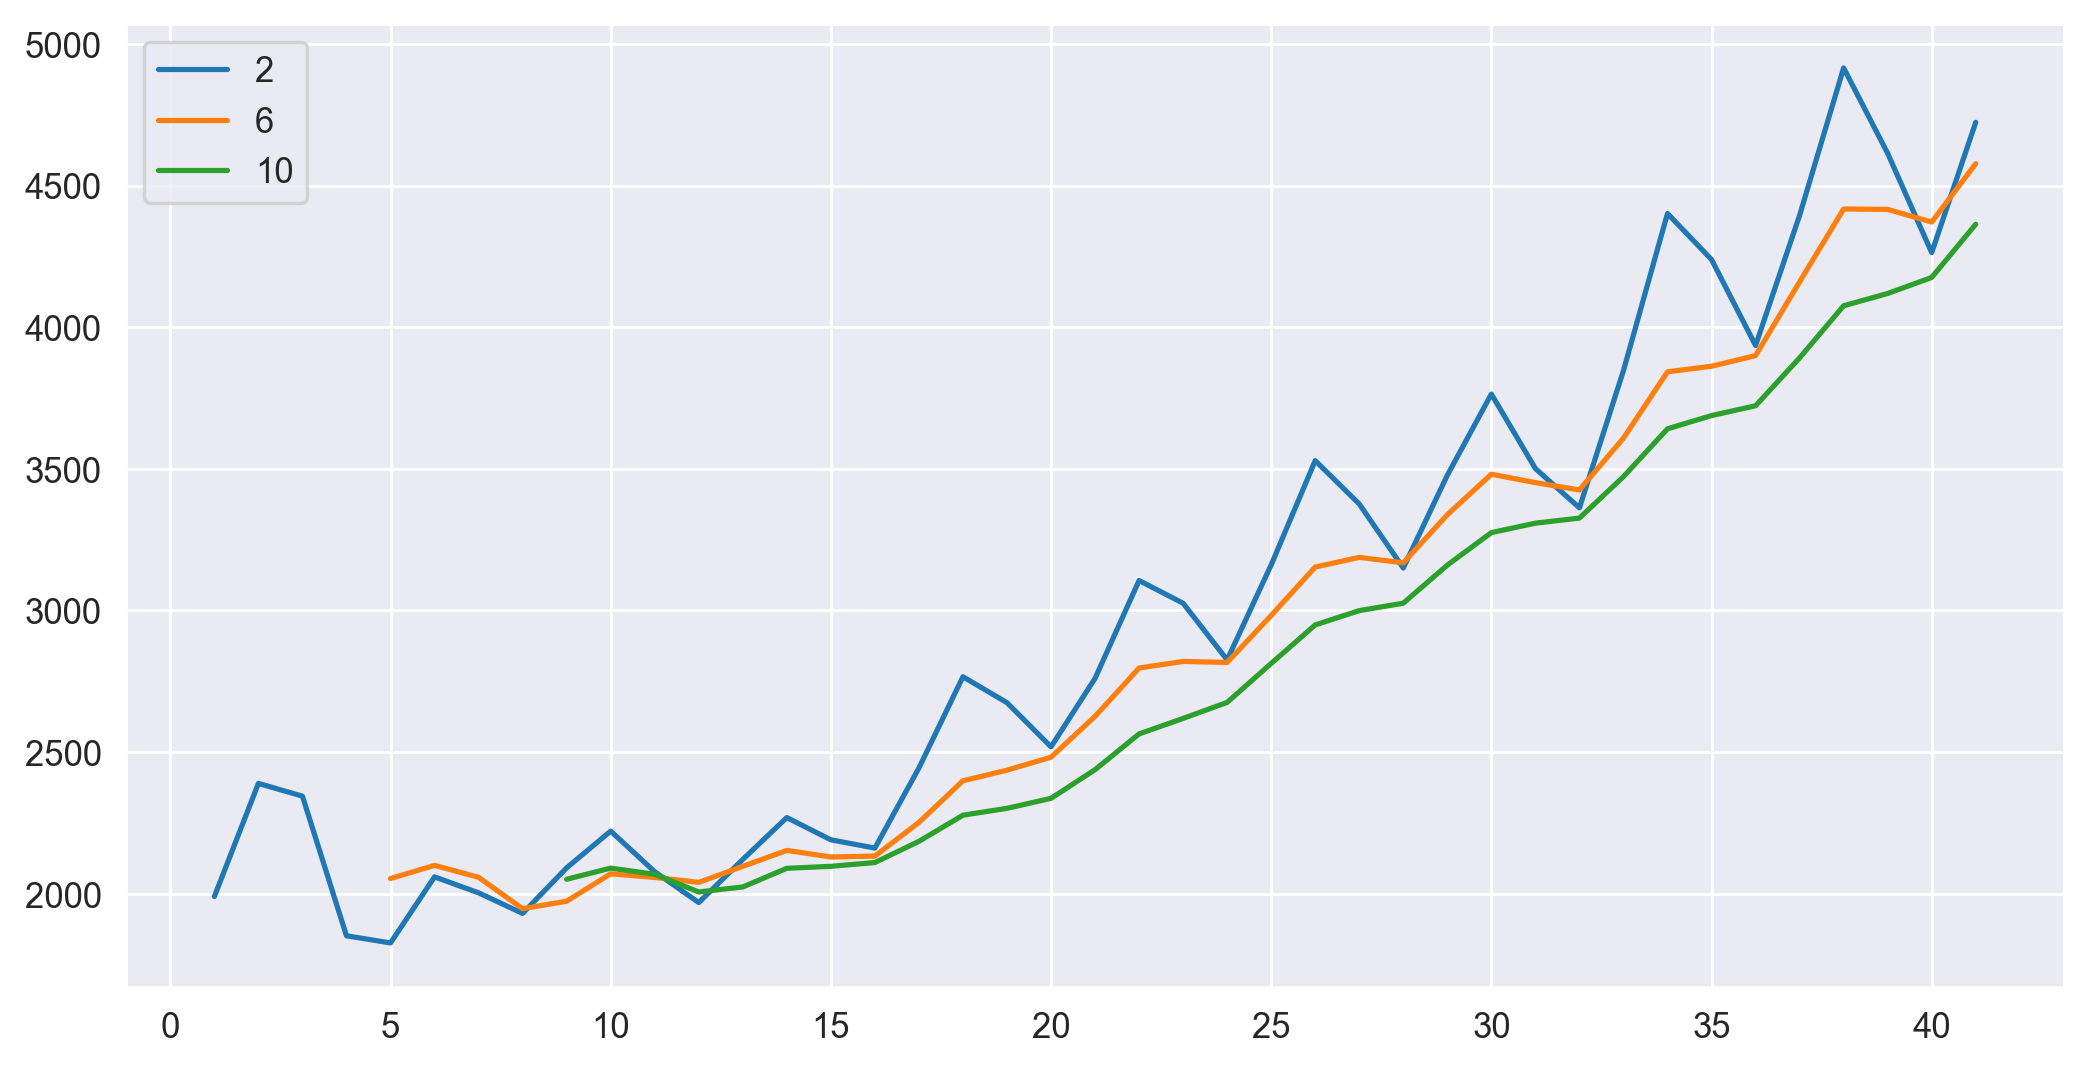

In [39]:
for i in range(2,12,4):
    coco['Sales'].rolling(i).mean().plot(label = str(i))
    plt.legend()

In [40]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Check stationarity of the data



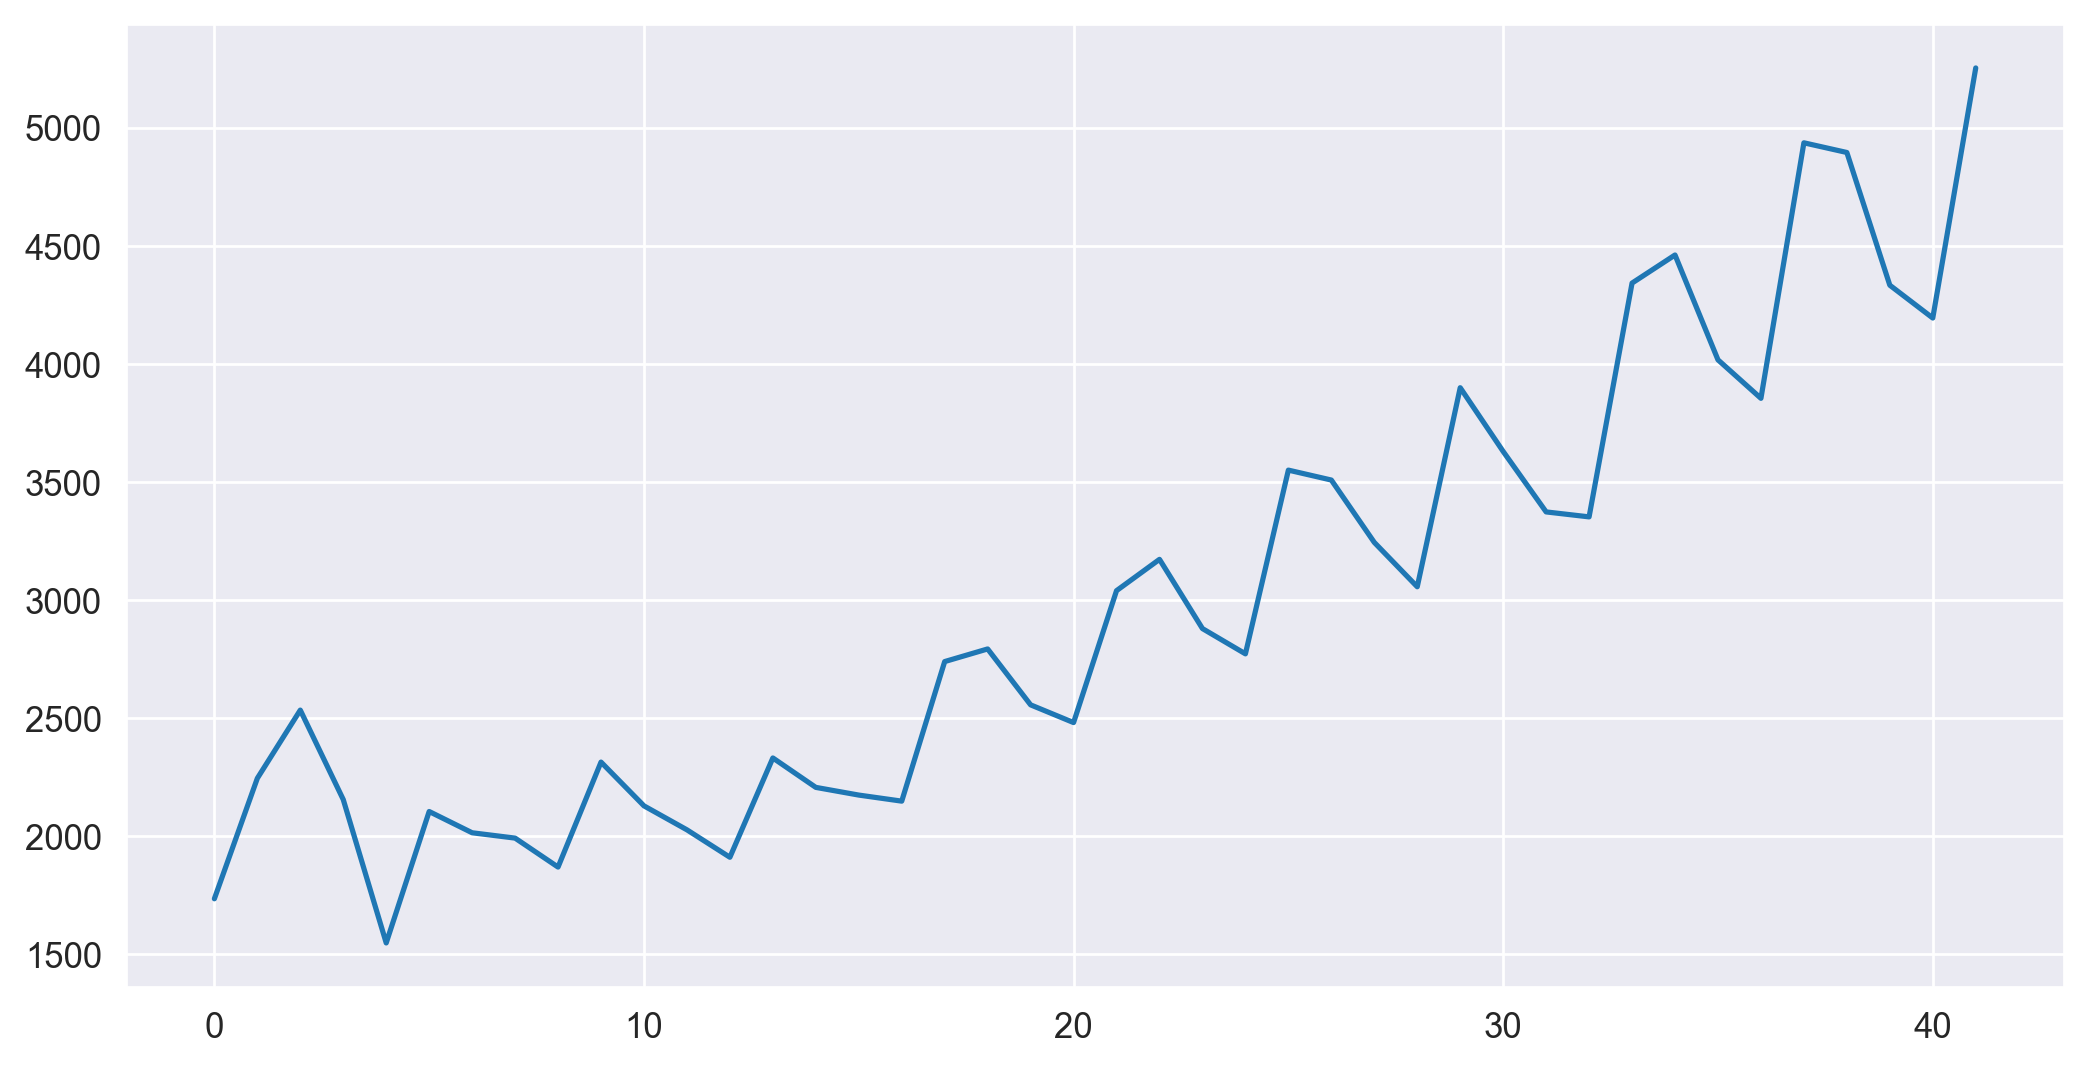

In [41]:
plt.plot(coco['Sales'])

In [42]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(coco['Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

According the p-value, the dataset is non-stationary as the p value is greater than alpha value.So, we can't build ARIMA Model.